In [1]:
import time as time
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering
from skimage import data

In [2]:
im_cam = data.camera() # read the image
# # Downsample the image by a factor of 4
# im_cam = im_cam[::2, ::2] + im_cam[1::2, ::2] + im_cam[::2, 1::2] + im_cam[1::2, 1::2]

X = np.reshape(im_cam, (-1, 1))

In [3]:
connectivity = grid_to_graph(*im_cam.shape)

In [4]:
print("Compute structured hierarchical clustering...")
st = time.time()

n_clusters = 15  # number of regions
# n_clusters = 5  # number of regions

ward = AgglomerativeClustering(n_clusters=n_clusters,
        linkage='ward', connectivity=connectivity).fit(X)
# ward = AgglomerativeClustering(n_clusters=n_clusters,
#         linkage='single', connectivity=connectivity).fit(X)
# ward = AgglomerativeClustering(n_clusters=n_clusters,
#         linkage='complete', connectivity=connectivity).fit(X)
# ward = AgglomerativeClustering(n_clusters=n_clusters,
#         linkage='average', connectivity=connectivity).fit(X)

label = np.reshape(ward.labels_, im_cam.shape)

print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

Compute structured hierarchical clustering...
Elapsed time:  15.661465167999268
Number of pixels:  262144
Number of clusters:  15


/tmp/ipykernel_8398/3636789489.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  color_map = cm.get_cmap("Spectral")
/tmp/ipykernel_8398/3636789489.py:11: UserWarning: The following kwargs were not used by contour: 'contours'
  plt.contour(label == l, contours=1,


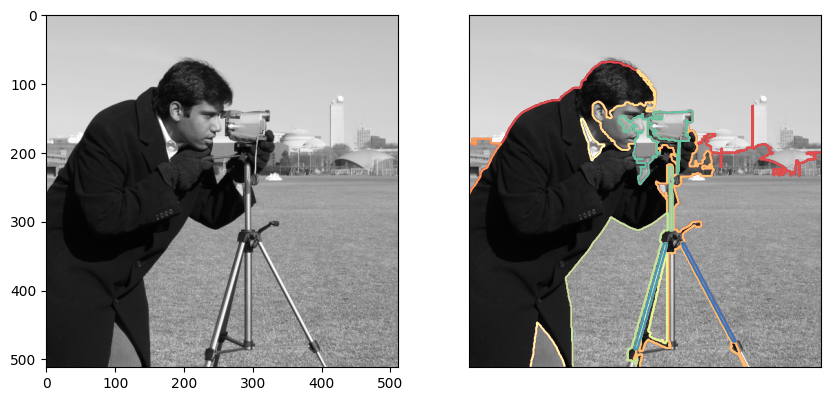

In [5]:
plt.figure(figsize=(10, 10))

plt.subplot(121)
plt.imshow(im_cam, cmap=plt.cm.gray)

plt.subplot(122)
plt.imshow(im_cam, cmap=plt.cm.gray)

color_map = cm.get_cmap("Spectral")
for l in range(n_clusters):
    plt.contour(label == l, contours=1,
                colors=[color_map(l / float(n_clusters)), ])
    
plt.xticks(())
plt.yticks(())
plt.show()